In [2]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [8]:
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/blob/main/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)



In [9]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [10]:
### Get summary of statistics of the data
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [11]:
#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

In [12]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

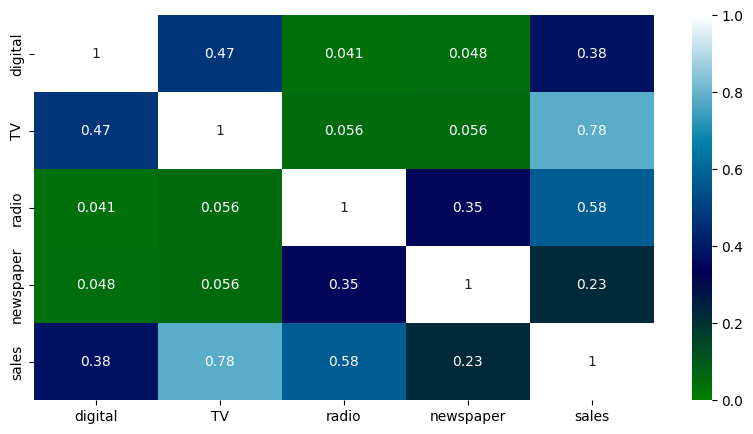

In [13]:
## Plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')

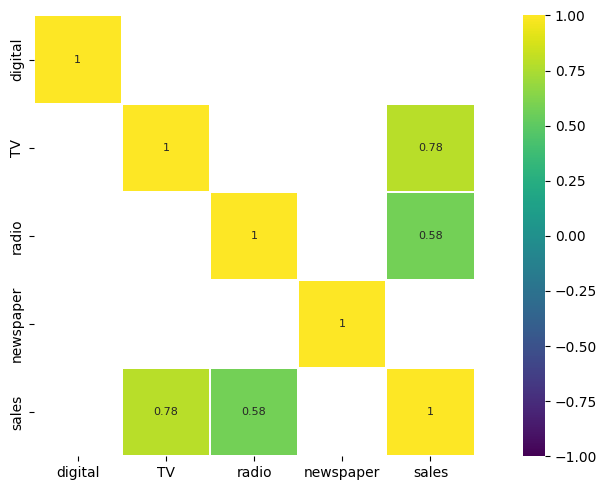

None

In [14]:
#create a correlation matrix
corr = advertising_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [15]:
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

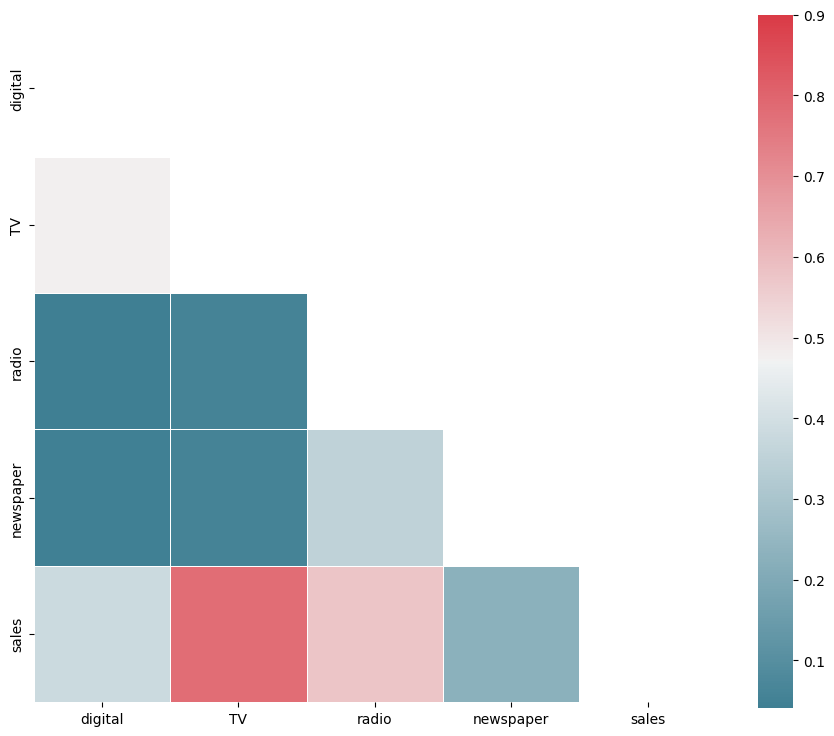

In [18]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(advertising_df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

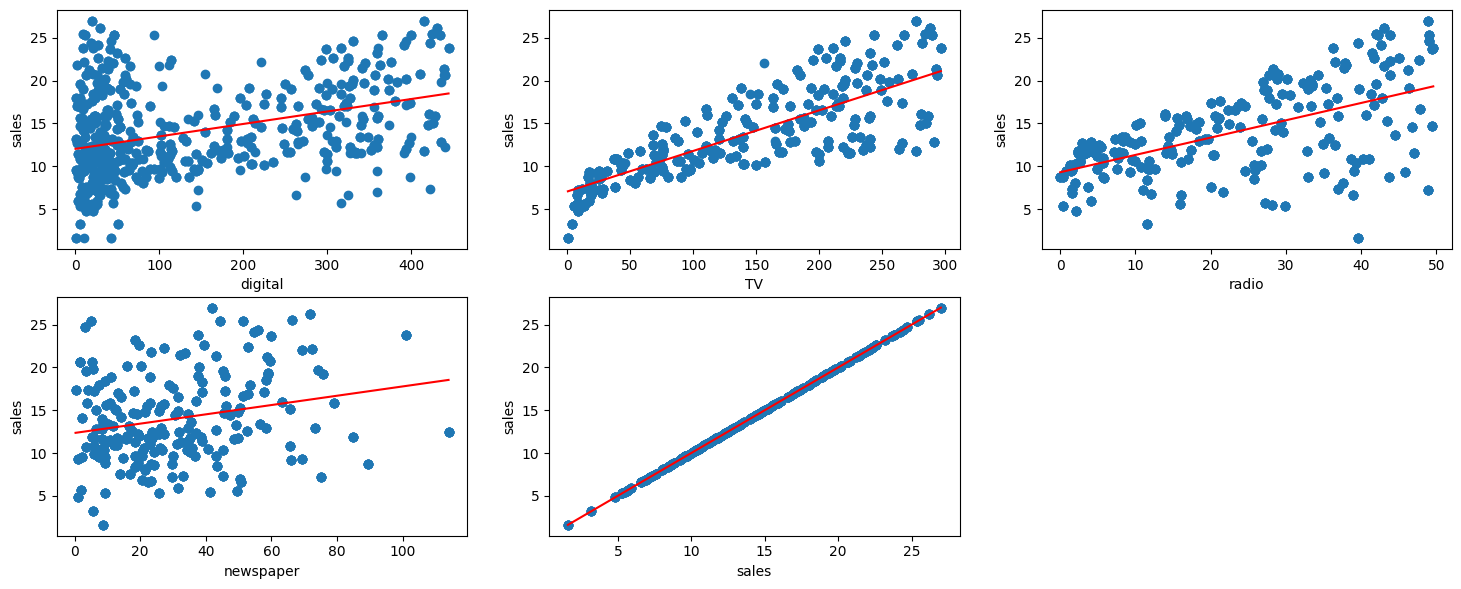

In [19]:
'''=== Show the linear relationship between features  and sales Thus, it provides that how the scattered
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label


In [20]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [21]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)

In [22]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [23]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 2:  Build Network

#### Build and Train the Network

In [24]:
## Build Model (Building a three layer network - with one hidden layer)
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32)



C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18749.0723 - mse: 18749.0723 - val_loss: 15318.0439 - val_mse: 15318.0439
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13526.2451 - mse: 13526.2451 - val_loss: 11050.1240 - val_mse: 11050.1240
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10750.9619 - mse: 10750.9619 - val_loss: 8265.0762 - val_mse: 8265.0762
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7012.3906 - mse: 7012.3906 - val_loss: 6395.7886 - val_mse: 6395.7886
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5635.8501 - mse: 5635.8501 - val_loss: 4985.1919 - val_mse: 4985.1919
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4734.5356 - mse: 4734.5356 - val_loss: 3953.1843 - val_mse: 3953.1843
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3655.3113 - mse: 3655.3113 - val_loss: 3179.6040 - val_mse: 3179.6040
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2638.0688 - mse: 2638.0688 - val_los

### Visualization:

You can add more 'flavor' to the graph by making it bigger and adding labels and names, as shown below.

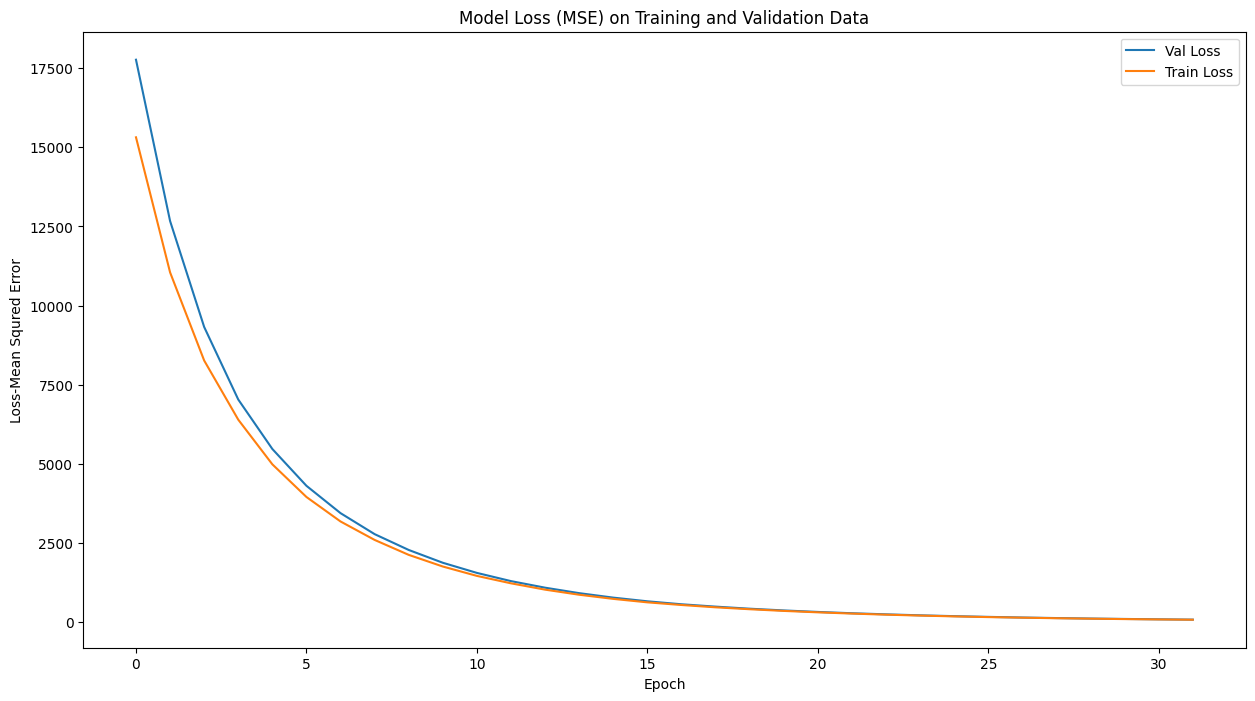

In [26]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()



In [43]:
'''=== predict the SALES =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[24.778751   13.533274   34.32774    21.794464   27.911856   28.88475
 14.694067   14.913922   14.3398285  12.239661    6.0710435  15.286852
  5.94812    15.819791   15.329552    8.267573   40.997528   14.498638
  6.909475   25.25427    32.94854     6.90203    21.640442   13.451784
  7.5336804   2.3317223  21.01613    14.334305   12.760489   11.896555
 26.167238   10.84517    34.301773   17.841387   37.125736   30.095585
 38.483326   23.383757   12.49843    13.713164   34.8667     10.536382
 12.384501   18.15063    19.861322   10.126449   13.955621   38.483326
 12.771337   11.975708   19.390375   15.329552   20.001991   12.795065
  3.5391178  32.6462     24.109795   17.620659   10.473704   13.478237
 14.563298   24.9951     15.59747    14.807779   11.034046   16.69618
 11.903549   33.17209     8.175816   41.39373     5.0549183  17.525387
  7.1552706  15.972287   30.83366    14.659981   18.092056   18.170874
 10.845172   23.151016   13.502216   3

In [44]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,26.2,24.778751
1,19.0,13.533274
2,12.8,34.327740
3,20.8,21.794464
4,16.9,27.911856
5,23.8,28.884750


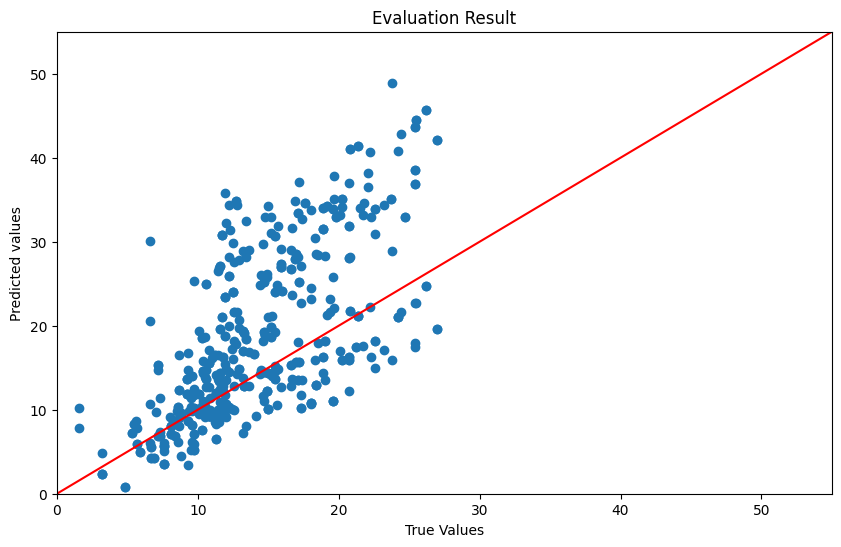

In [45]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

<Axes: xlabel='sales'>

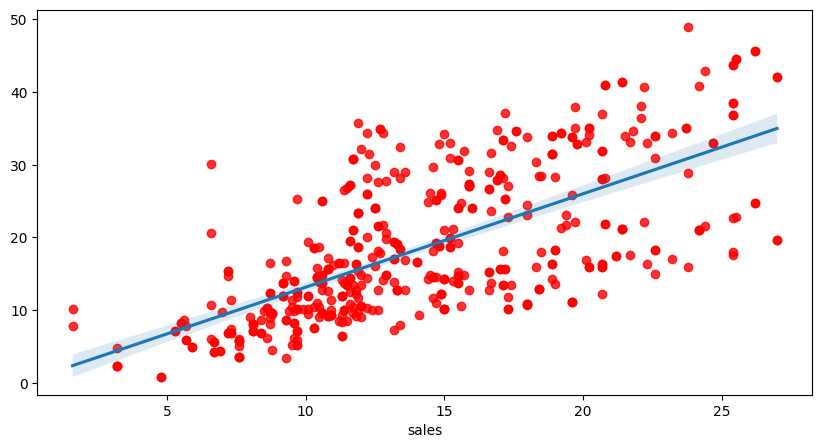

In [46]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

In [47]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8.57486403101948
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
8.681825422190679


In [48]:
model2 = Sequential()
model2.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model2.add(Dense(5,activation='relu'))
model2.add(Dense(1))

loss_fun = 'mse'
# Compile Model
model2.compile(optimizer='adam', loss=loss_fun ,metrics=[loss_fun])


#  Fit the Model
history2 = model2.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32)




Epoch 1/32


C:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8228.1816 - mse: 8228.1816 - val_loss: 5854.2686 - val_mse: 5854.2686
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5172.3101 - mse: 5172.3101 - val_loss: 3708.7021 - val_mse: 3708.7021
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3143.8906 - mse: 3143.8906 - val_loss: 2368.5093 - val_mse: 2368.5093
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2099.3977 - mse: 2099.3977 - val_loss: 1424.4136 - val_mse: 1424.4136
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1246.4426 - mse: 1246.4426 - val_loss: 683.3774 - val_mse: 683.3774
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 496.1487 - mse: 496.1487 - val_loss: 152.6645 - val_mse: 152.6645
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.8308 - mse: 101.8308 - val_loss: 42.0536 - val_mse: 42.0536
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.1364 - mse: 39.1364 - val_loss: 34.2066 - val_mse: 34.2066
Epoch 9

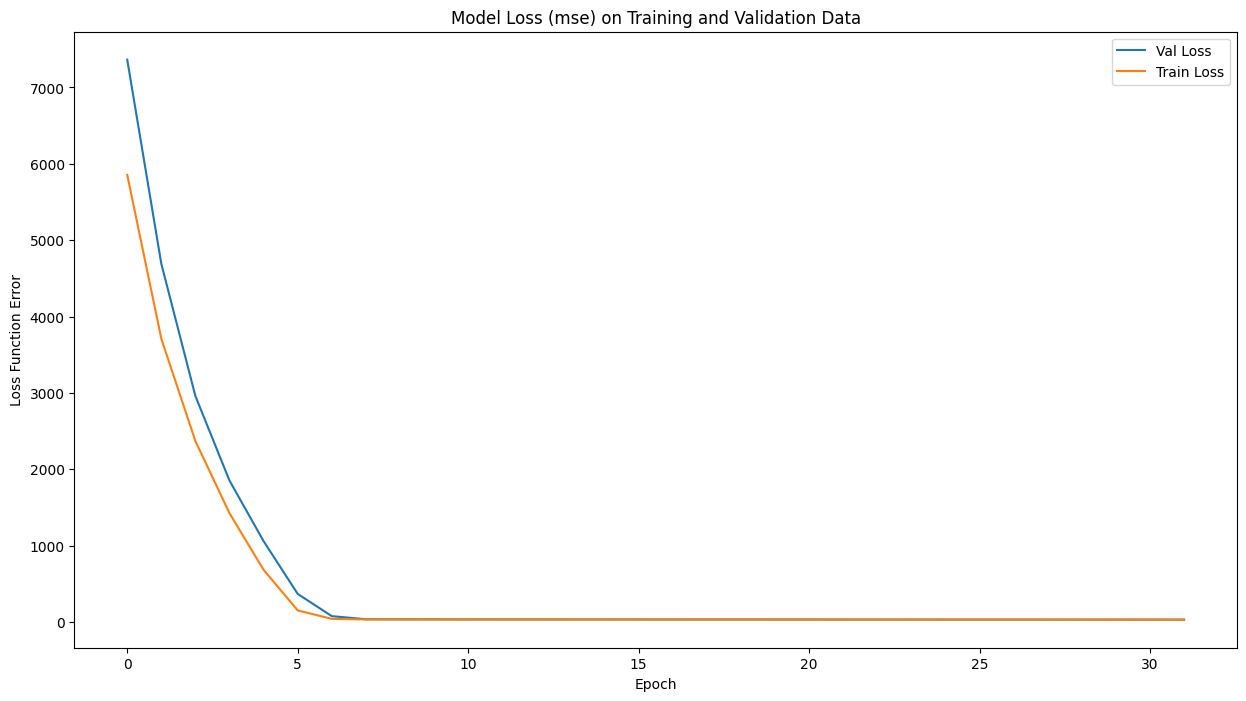

In [49]:

## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title(f'Model Loss ({loss_fun}) on Training and Validation Data')
plt.ylabel('Loss Function Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
[14.144204   8.265262  26.258286  13.602902  15.632981  14.739621
  5.2958717  9.842437  14.469245  11.051511   2.9274719 10.651063
  1.9709971 10.358542   5.3969817  3.2802017 25.431686   5.755925
  3.704273  12.99446   19.719227   4.4137383 15.406194   9.814305
 10.400331   1.4261957 13.214227  20.460499  13.693343   4.3757334
 17.480412   6.206465  18.63613   17.447327  19.011747  13.519524
 22.384502  12.190959  16.194859   5.936714  24.584927  11.890933
  9.2883005  7.785247  11.442498   7.200082   9.666429  22.384502
  4.8965693  6.904606  14.184772   5.3969817 13.194066  11.470283
  2.677963  23.826405  11.132315  11.655942   5.447036  15.616836
  5.9089403 18.507442   6.081498  12.855422   6.6517344  6.287337
  9.405969  19.65229    5.7419577 26.853142   2.418044  15.003938
  6.139085  14.174548  20.93518   14.000207  10.375253   7.8806343
  6.206465  13.487428   8.310369  22.972157   8.188175  12.181783
  5.48468   18.70685   14.596477 

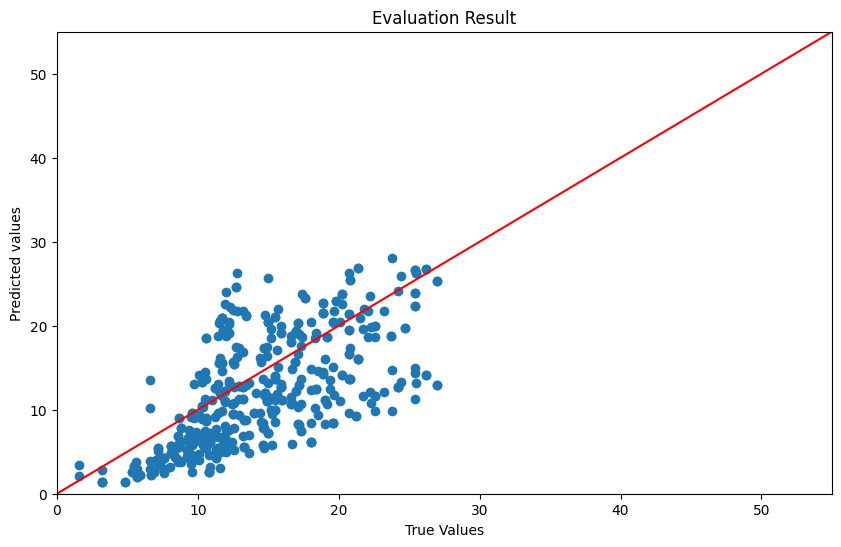

<Axes: xlabel='sales'>

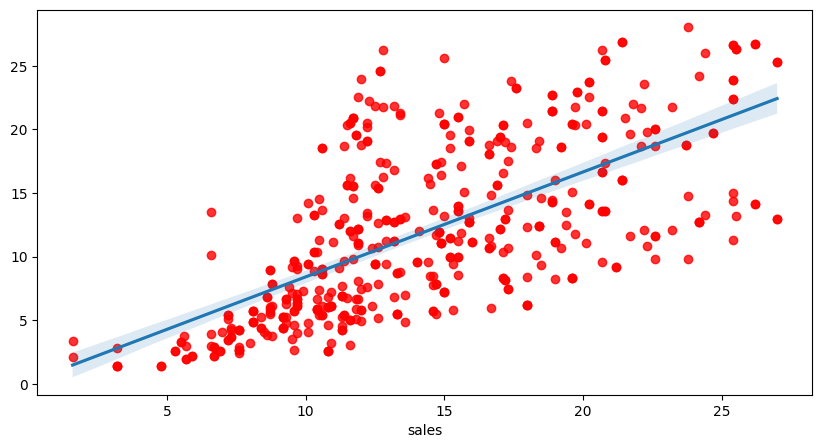

In [50]:
'''=== predict the SALES =='''

# predict SALES using the test data
test_predictions = model2.predict(X_test).flatten()
print(test_predictions)


# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) # Show first six rows
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})


In [51]:


pred_train= model2.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5.632327905439297
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
5.537478564457621
